In [67]:
import torch

device = 'cuda'

scores_dict = torch.load('scores_dict_0.pt', map_location=device)

pool_indices = list(scores_dict.keys())
scores = list(scores_dict.values())


bs = 10000
nt = 14

scores_temp = torch.zeros(bs, nt, device=device)
for i, (b,t) in enumerate(pool_indices):
    scores_temp[b,t] = scores[i]
scores = scores_temp

scores = torch.log(scores + 1e-6)

In [68]:
from tqdm import tqdm

time_steps_acquire = 13 * 512
selection_method = "stochastic"
train_nts = torch.ones(bs, dtype=torch.int64)
train_nts[:32] = nt

if selection_method == "stochastic":
    gumbel_noise = torch.distributions.gumbel.Gumbel(0, 1).sample(scores.shape).to(device)
    scores += gumbel_noise

for i in tqdm(range(time_steps_acquire)):
    if selection_method == "random":
        weights = (train_nts < nt).float()
        new_idx = torch.multinomial(weights, num_samples=1, replacement=False)[0]
    elif selection_method == "variance" or selection_method == "stochastic":
        scores_candidates = torch.stack([scores[b, train_nts[b].item()] for b in range(bs) if train_nts[b].item() < nt], dim=0)
        new_idx = torch.argmax(scores_candidates)
        indices = [b for b in range(bs) if train_nts[b].item() < nt]
        new_idx = indices[new_idx]
        # features_candidates = torch.stack([features_dict[(b, train_nts[b].item())] for b in range(bs) if train_nts[b].item() < nt], dim=0) # [bs*(nt-train_nt), num_models, ...]
        # with torch.no_grad():
        #     trace = torch.einsum('bnd,bnd->b', features_candidates, features_candidates) # [bs*(nt-train_nt)]
        # new_idx = torch.argmax(trace)
        # indices = [b for b in range(bs) if train_nts[b].item() < nt]
        # new_idx = indices[new_idx]
    else:
        raise ValueError(f"Selection method {selection_method} not implemented.")
    assert train_nts[new_idx].item() < nt
    train_nts[new_idx] += 1

  0%|          | 0/6656 [00:00<?, ?it/s]

100%|██████████| 6656/6656 [14:19<00:00,  7.74it/s]


In [69]:
important = []
for i in range(train_nts.shape[0]):
    if train_nts[i] == 14:
        important.append(i)
print(len(important))
print(important)

499
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 61, 73, 75, 84, 148, 202, 216, 223, 225, 228, 259, 388, 409, 426, 436, 446, 488, 495, 516, 533, 535, 542, 549, 565, 581, 629, 630, 649, 654, 675, 699, 715, 769, 772, 780, 781, 809, 822, 825, 883, 942, 953, 980, 982, 1005, 1019, 1055, 1056, 1077, 1080, 1120, 1136, 1157, 1176, 1178, 1188, 1203, 1211, 1215, 1225, 1246, 1264, 1267, 1269, 1270, 1291, 1304, 1317, 1368, 1414, 1451, 1453, 1466, 1470, 1491, 1512, 1525, 1574, 1578, 1621, 1622, 1642, 1644, 1657, 1723, 1754, 1761, 1763, 1783, 1829, 1832, 1833, 1844, 1853, 1896, 1929, 1935, 1941, 1956, 1971, 1984, 1985, 2010, 2031, 2043, 2068, 2077, 2078, 2143, 2182, 2197, 2257, 2258, 2264, 2287, 2297, 2333, 2372, 2422, 2424, 2442, 2452, 2458, 2467, 2477, 2525, 2547, 2552, 2575, 2577, 2582, 2593, 2602, 2647, 2673, 2721, 2745, 2755, 2758, 2772, 2790, 2795, 2843, 2851, 2864, 2866, 2872, 2896, 2897, 2934, 2963, 2984, 3020, 3055, 3

(array([152.,   8.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,  47.]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <BarContainer object of 10 artists>)

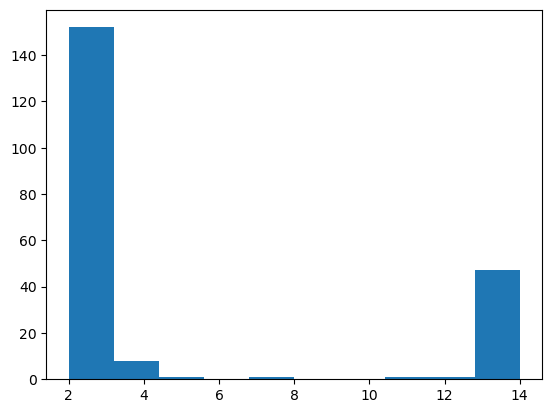

In [66]:
plt.hist(train_nts[train_nts!=1].cpu())
# don't show 1



In [51]:
important = []
for i in range(train_nts.shape[0]):
    if train_nts[i] == 1:
        important.append(i)
print(len(important))
print(important)

9936
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 24

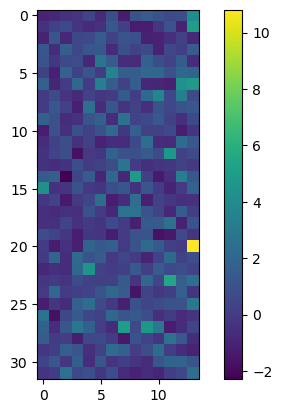

In [61]:
from matplotlib import pyplot as plt

plt.imshow(scores.cpu()[0:32])
plt.colorbar()

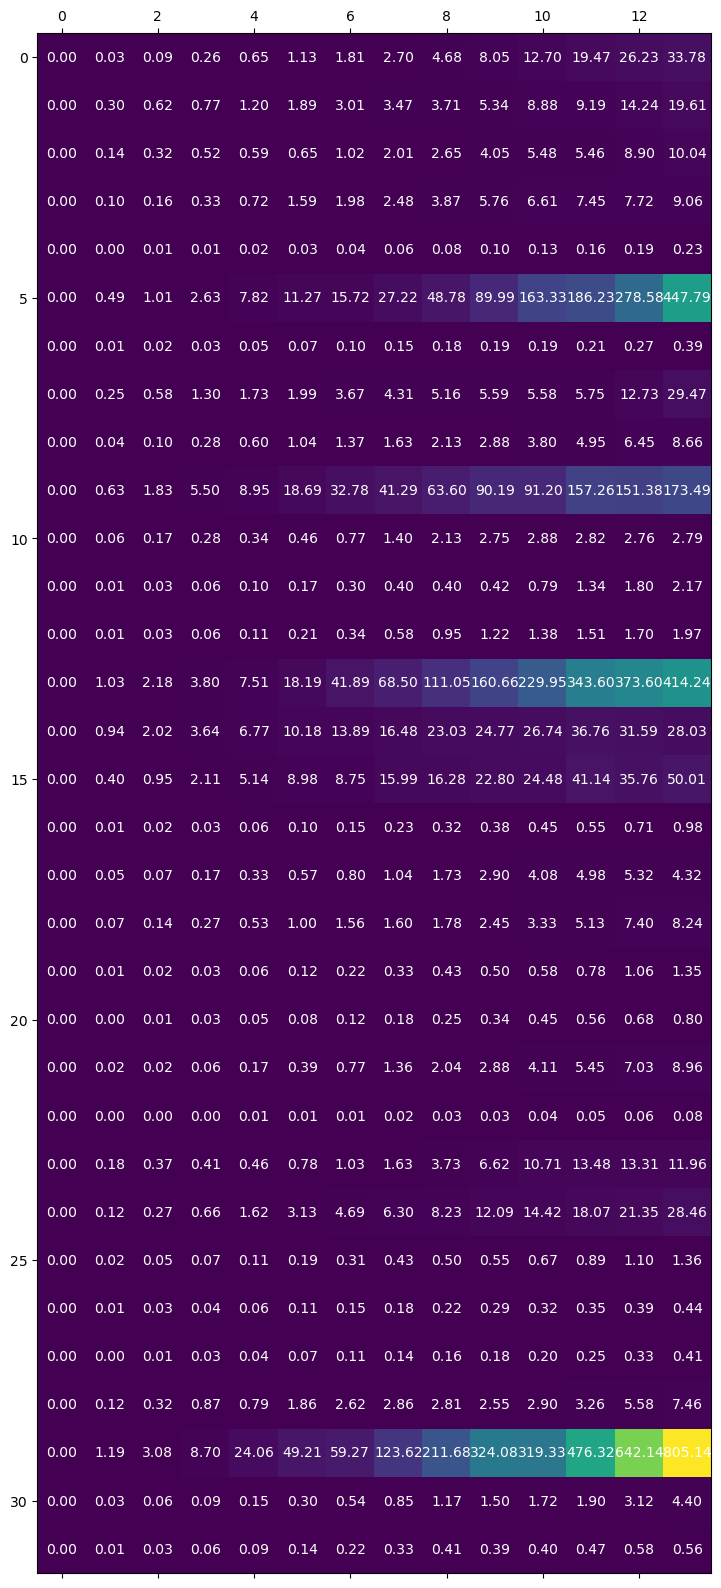

In [27]:
heatmap = torch.zeros(32,14)

for b in range(32,64):
    for i in range(14):
        if (b,i) in scores_dict:
            heatmap[b-32, i] = scores_dict[(b,i)]


import numpy as np
from matplotlib import pyplot as plt

heatmap = heatmap.numpy()
# create annotated heatmap with values
fig, ax = plt.subplots()
# cax = ax.matshow(heatmap, cmap='hot')
cax = ax.matshow(heatmap)

for (i, j), val in np.ndenumerate(heatmap):
    # text white
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

# make figure wider
fig.set_size_inches(10, 20)


In [39]:
torch.tensor([0, torch.tensor(1)])

tensor([0, 1])

In [32]:
# Dynamic programming for knapsack problem

budget = 416


dp = torch.zeros(1024+1, budget+1)

dict_keys([(32, 1), (32, 2), (32, 3), (32, 4), (32, 5), (32, 6), (32, 7), (32, 8), (32, 9), (32, 10), (32, 11), (32, 12), (32, 13), (33, 1), (33, 2), (33, 3), (33, 4), (33, 5), (33, 6), (33, 7), (33, 8), (33, 9), (33, 10), (33, 11), (33, 12), (33, 13), (34, 1), (34, 2), (34, 3), (34, 4), (34, 5), (34, 6), (34, 7), (34, 8), (34, 9), (34, 10), (34, 11), (34, 12), (34, 13), (35, 1), (35, 2), (35, 3), (35, 4), (35, 5), (35, 6), (35, 7), (35, 8), (35, 9), (35, 10), (35, 11), (35, 12), (35, 13), (36, 1), (36, 2), (36, 3), (36, 4), (36, 5), (36, 6), (36, 7), (36, 8), (36, 9), (36, 10), (36, 11), (36, 12), (36, 13), (37, 1), (37, 2), (37, 3), (37, 4), (37, 5), (37, 6), (37, 7), (37, 8), (37, 9), (37, 10), (37, 11), (37, 12), (37, 13), (38, 1), (38, 2), (38, 3), (38, 4), (38, 5), (38, 6), (38, 7), (38, 8), (38, 9), (38, 10), (38, 11), (38, 12), (38, 13), (39, 1), (39, 2), (39, 3), (39, 4), (39, 5), (39, 6), (39, 7), (39, 8), (39, 9), (39, 10), (39, 11), (39, 12), (39, 13), (40, 1), (40, 2), (40